In [4]:
##문제 정의: 전국 지하수 시설 현황 및 이용량 분석하여 그 데이터를 시각화하고자 합니다. 
##예쌍 결과: 인구수가 많은 서울과 경기도에 많은 시설이 분포되어 있고 또한 이용량 또한 많을
##것이라고 에상하고 있습니다.

In [93]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [94]:
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
#데이터 로드
df = pd.read_csv("./underwater.csv")
df.head()

,시도,시군구,총계-개소수(개소),총계-이용량(톤),국가공단-개소수(개소),국가공단-이용량(톤),지방공단-개소수(개소),지방공단-이용량(톤),농공단지-개소수(개소),농공단지-이용량(톤),자유입지업체-개소수(개소),자유입지업체-이용량(톤),기타-개소수(개소),기타-이용량(톤)
0,강원특별자치도,강릉시,73,1287978,0,0,5,13389,2,1650,47,1175234,19,97705
1,강원특별자치도,고성군,32,152068,0,0,0,0,2,3056,18,110389,12,38623
2,강원특별자치도,동해시,66,3276675,1,12000,2,2352,0,0,27,1826012,36,1436311
3,강원특별자치도,삼척시,47,1034990,0,0,0,0,0,0,28,484801,19,550189
4,강원특별자치도,속초시,71,187353,0,0,0,0,40,150058,27,34993,4,2302


In [97]:
#데이터 전처리한 결과입니다. Non-Null Count즉 결측치가 없다는 것을 확인 가능합니다.
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   시도              217 non-null    object
 1   시군구             217 non-null    object
 2   총계-개소수(개소)      217 non-null    int64 
 3   총계-이용량(톤)       217 non-null    int64 
 4   국가공단-개소수(개소)    217 non-null    int64 
 5   국가공단-이용량(톤)     217 non-null    int64 
 6   지방공단-개소수(개소)    217 non-null    int64 
 7   지방공단-이용량(톤)     217 non-null    int64 
 8   농공단지-개소수(개소)    217 non-null    int64 
 9   농공단지-이용량(톤)     217 non-null    int64 
 10  자유입지업체-개소수(개소)  217 non-null    int64 
 11  자유입지업체-이용량(톤)   217 non-null    int64 
 12  기타-개소수(개소)      217 non-null    int64 
 13  기타-이용량(톤)       217 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 23.9+ KB


시도                0
시군구               0
총계-개소수(개소)        0
총계-이용량(톤)         0
국가공단-개소수(개소)      0
국가공단-이용량(톤)       0
지방공단-개소수(개소)      0
지방공단-이용량(톤)       0
농공단지-개소수(개소)      0
농공단지-이용량(톤)       0
자유입지업체-개소수(개소)    0
자유입지업체-이용량(톤)     0
기타-개소수(개소)        0
기타-이용량(톤)         0
dtype: int64

In [98]:
#데이터 분포 
df.describe()

,총계-개소수(개소),총계-이용량(톤),국가공단-개소수(개소),국가공단-이용량(톤),지방공단-개소수(개소),지방공단-이용량(톤),농공단지-개소수(개소),농공단지-이용량(톤),자유입지업체-개소수(개소),자유입지업체-이용량(톤),기타-개소수(개소),기타-이용량(톤)
count,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000,2.170000e+02
mean,61.087558,7.581041e+05,1.105991,2.910640e+04,5.465438,8.175621e+04,4.336406,9.318847e+04,28.612903,3.341429e+05,21.566820,2.199102e+05
std,79.790447,1.078764e+06,5.585432,2.057534e+05,13.040178,2.067490e+05,6.600520,1.847958e+05,59.269218,6.780379e+05,26.792177,3.459499e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,13.000000,6.899900e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000,6.739000e+03,6.000000,1.888100e+04
50%,35.000000,3.255720e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,1.970000e+03,9.000000,7.319700e+04,13.000000,8.548300e+04
75%,74.000000,1.022093e+06,0.000000,0.000000e+00,3.000000,5.147500e+04,6.000000,1.024800e+05,27.000000,3.723590e+05,27.000000,2.208420e+05
max,677.000000,7.458206e+06,70.000000,2.676180e+06,82.000000,1.555060e+06,40.000000,1.106280e+06,555.000000,5.299442e+06,192.000000,1.958015e+06


In [102]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = './nanum/NanumGothic.otf'  # 나눔고딕 폰트 예시
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family='./nanum/NanumGothic.otf')
rc('font', family=font_name)
fontprop = fm.FontProperties(fname=font_path, size=10)

Text(0.5, 1.0, '지역별 지하수 처리시설 개수')

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


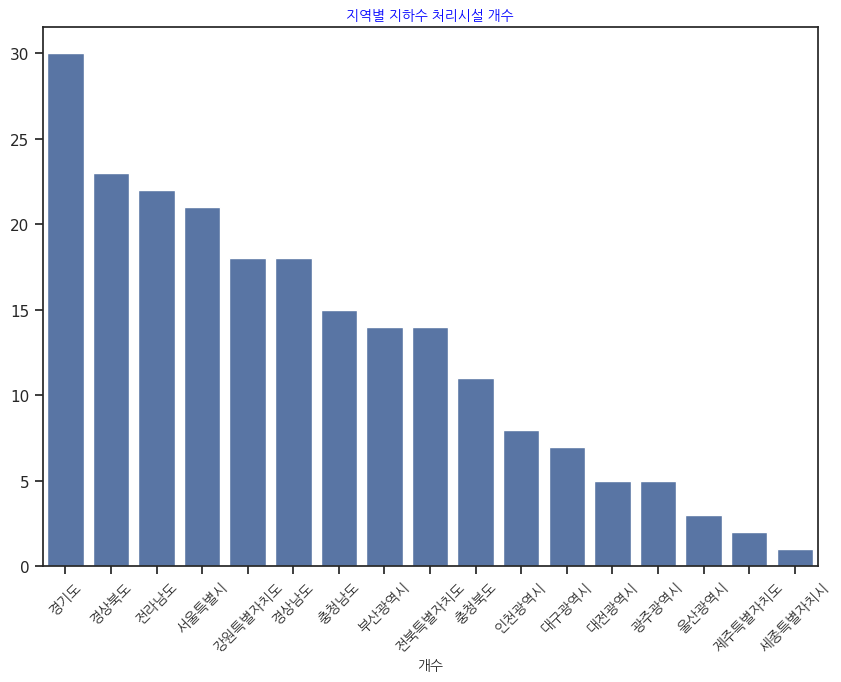

In [104]:
#데이터에있는 모든 지역의 지역별 지하수 처리시설 개수를 나타냈습니다.
import seaborn as sns

top = df['시도'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:].index,y=top[:].values)
plt.xticks(rotation=45,fontproperties=fontprop)
plt.xlabel('개수', fontproperties=fontprop)
plt.title('지역별 지하수 처리시설 개수',color = 'blue',fontproperties=fontprop)


Text(0.5, 1.0, '지역별 지하수 처리시설 개수')

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


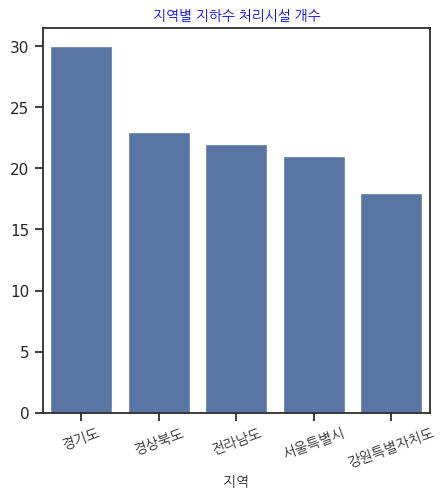

In [105]:
#순서대로 위에서 top 5만 보이게 정리했습니다.
import seaborn as sns
top = df['시도'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=20,fontproperties=fontprop)
plt.xlabel('지역', fontproperties=fontprop)
plt.title('지역별 지하수 처리시설 개수',color = 'blue',fontproperties=fontprop)

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/codespace/.local/lib/python3.10/site-pack

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


<Axes: >

findfont: Font family 'NanumGothicOTF' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-pack

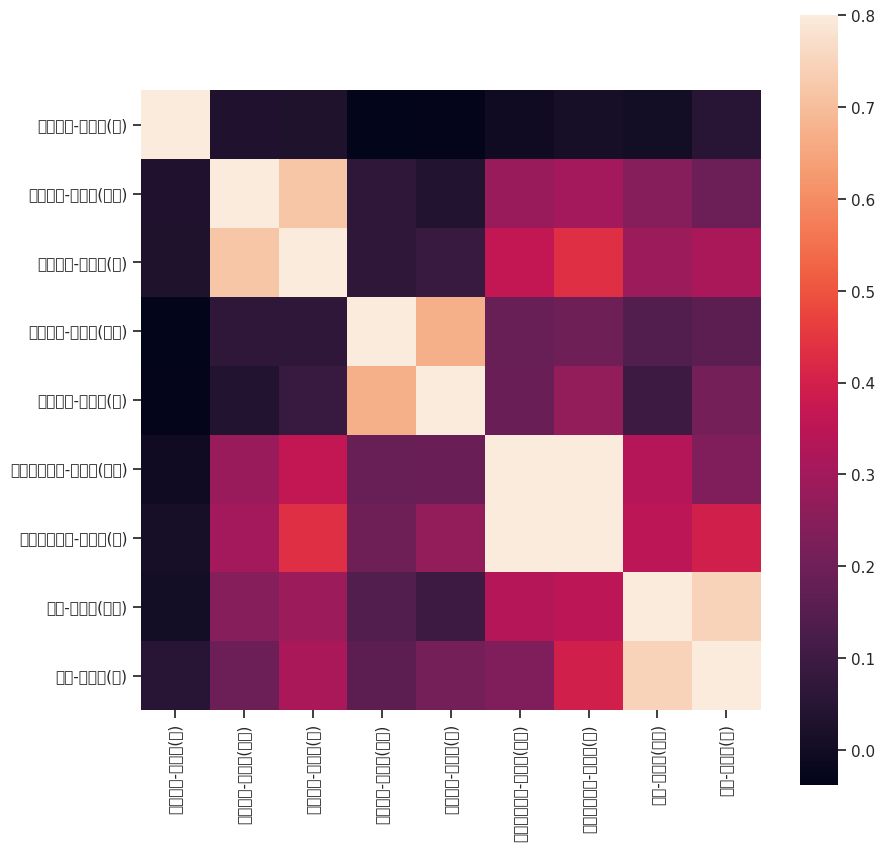

In [112]:
#df에서 5번쨰 열인 국가공간 개소의 수 부터 마지막 열인 기타 이용량까지를 히트맵으로 표현했습니다.
#10x10 인치로 설정하였고 국가공단이나 지방공단, 농공단지 등의 시설의 수와 이용량의 관계를 히트맴으로인하여 상관관계를 파악하기 용이합니다.

df_modified = df.iloc[:, 5:]
corrmat = df_modified.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current 

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


Text(0.5, 35.99999999999997, '총계-이용량(톤)')

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


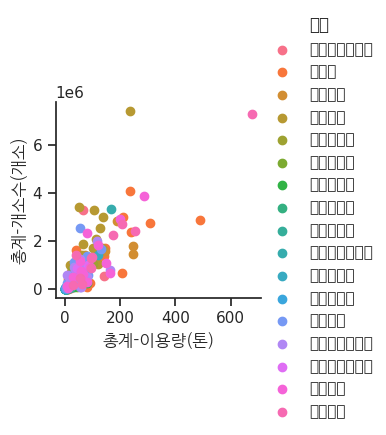

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# FacetGrid를 사용하여 산점도 그리기
#전국의 시도에서 총개소수와 이용량 사이의 관계를 산점도로 표현했습니다.
sns.FacetGrid(df, hue="시도") \
   .map(plt.scatter, "총계-개소수(개소)", "총계-이용량(톤)") \
   .add_legend()
plt.ylabel('총계-개소수(개소)', fontproperties=prop)
plt.xlabel('총계-이용량(톤)', fontproperties=prop)


Text(0.5, 0, '기타-이용량(톤)')

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


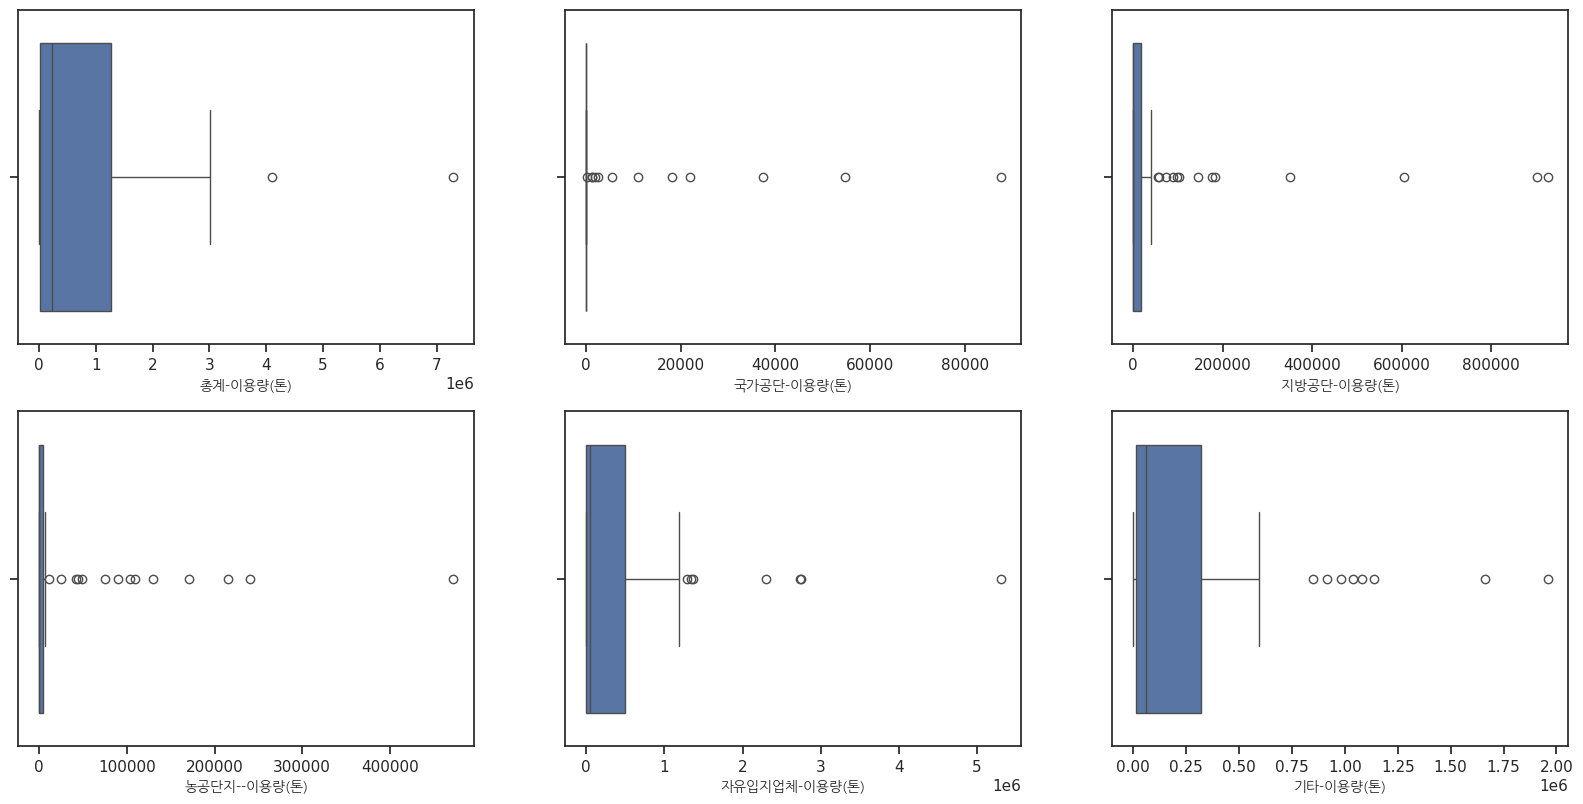

In [47]:
#4행3열의 상자 그림을 입니다.1번 그림은 전국 총이용량을 나타내고 2번은 전국의 국가공단에서 사용하는양
#3번은 지방공단, 4번은 농업,공업단지, 5번은 개별 사유지, 6번은 그외 기타지역입니다.
plt.figure(figsize=(20,20), dpi=100)

plt.subplot(4,3,1)
sns.boxplot(x = '총계-이용량(톤)', data = df)
plt.xlabel('총계-이용량(톤)', fontproperties=fontprop)

plt.subplot(4,3,2)
sns.boxplot(x = '국가공단-이용량(톤)', data = df)
plt.xlabel('국가공단-이용량(톤)', fontproperties=fontprop)

plt.subplot(4,3,3)
sns.boxplot(x = '지방공단-이용량(톤)', data = df)
plt.xlabel('지방공단-이용량(톤)', fontproperties=fontprop)

plt.subplot(4,3,4)
sns.boxplot(x = '농공단지-이용량(톤)', data = df)
plt.xlabel('농공단지--이용량(톤)', fontproperties=fontprop)

plt.subplot(4,3,5)
sns.boxplot(x = '자유입지업체-이용량(톤)', data = df)
plt.xlabel('자유입지업체-이용량(톤)', fontproperties=fontprop)

plt.subplot(4,3,6)
sns.boxplot(x = '기타-이용량(톤)', data = df)
plt.xlabel('기타-이용량(톤)', fontproperties=fontprop)

In [67]:
#전국의 공단의 개소 숫자를  X에 저장한 후에 Y열에 숫자형 데이터로 변환하였습니다.
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

X = df.loc[:, ('시도','국가공단-개소수(개소)','지방공단-개소수(개소)','농공단지-개소수(개소)','기타-개소수(개소)')]
y = df['시도']
X['시도'] = le.fit_transform(X['시도'])
y = le.transform(y)

In [68]:
#클러스터의 수를 3으로 지정해서 데이터가 0,1,2값으로 출력되었습니다. 
#kmeans 객체를  생성해서 시드와 클러스터 값을 받아서 예측값을 y_cluster_kmeans에 저장합니다.
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2], dtype=int32)

In [69]:
#엘보우 방법을 통해 Kmeans에 따른 WCSS 값을 정리합니다.
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


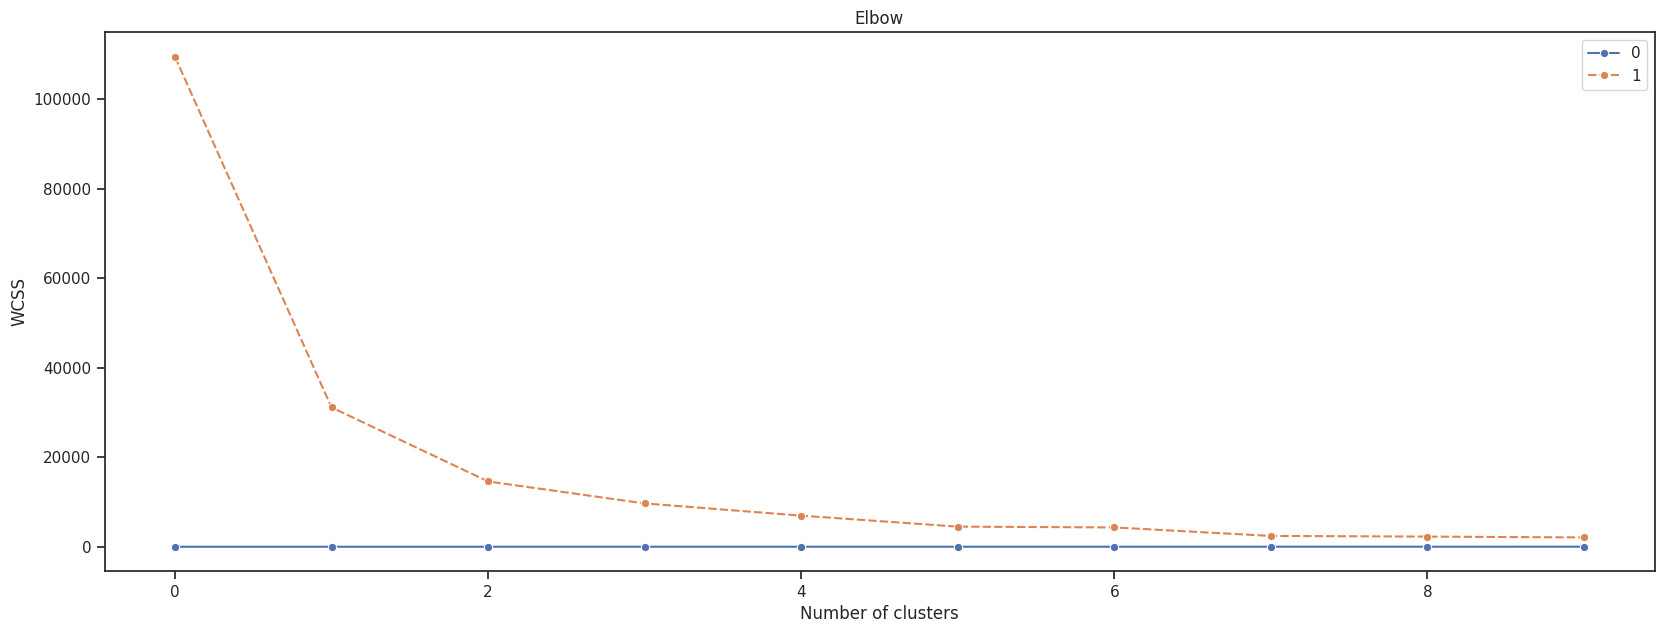

In [70]:
#Kmeans와 WCSS사이의 관계를 그래프로 나타내었습니다. 
#그래프를 보면 4지점에서 부터 감소폭이 적어짐을 확인할 수 있습니다. 따라서 적절한 K값은 4라고 보여집니다.
plt.figure(figsize=(20,7))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='green')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


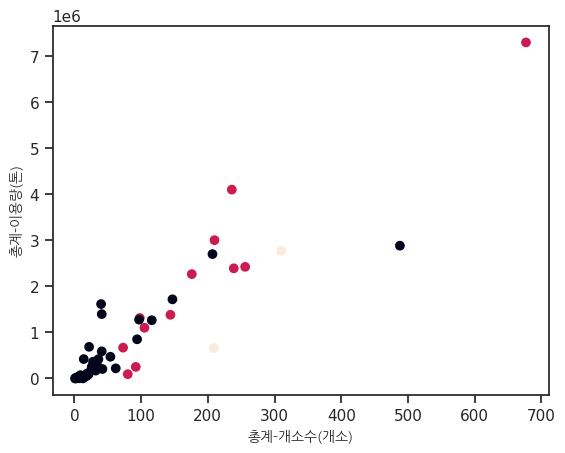

In [71]:
#클러스터링 결과를 산점도로 시각화했습니다. 
#전국의 개소수를 x축으로, 이용량을 Y축으로 하여 그 상관관계를 산점도로 표현하였습니다.
#개소의 수와 이용량이 비례하게 증가함을 확인 할 수 있습니다.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['총계-개소수(개소)'],df['총계-이용량(톤)'],c = labels)
plt.xlabel('총계-개소수(개소)', fontproperties=fontprop)
plt.ylabel('총계-이용량(톤)', fontproperties=fontprop)
plt.show()

In [73]:
#실루엣 점수를 확인해보니 0.7226.. 이 나왔습니다. 결과가 1에 가까울 수록 클러스터링 결과가 잘 나왔음을 의미합니다. 0.7이면 1에 가깝게 나온것 같습니다.
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("silhouette score:", silhouette_avg)

silhouette score: 0.726404688577187


In [60]:
#정확도는 0.44%가 나왔습니다. 
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 27 out of 61 samples were correctly labeled.
Accuracy score: 0.44


In [ ]:
#평가: 실루엣 점수는 0.7이 나왔고 정확도는 0.44가 나왔습니다. 실루엣 점수가 1에 가까울 수록 클러스터링 결과가 잘 나왔음을 의미하기 때문에 적절한 클러스터링 과정이였던 것 같습니다.